In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Loading the dataset -> data matrix

In [164]:
# n = 5
# m = 2
# data = np.random.rand(n, m)
# data

mean = [3, 4]
AAT = [[1,3],[3,12]]
size = (3000)
data = np.random.default_rng().multivariate_normal(mean, AAT, size=size)

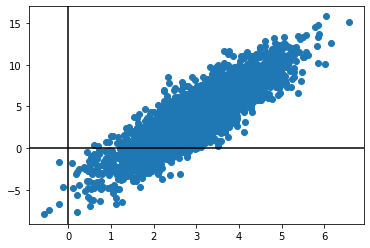

In [165]:
plt.axhline(color='black')
plt.axvline(color='black')
plt.scatter(x = data[:, 0], y = data[:, 1])

## Preprocessing

In [166]:
# Shift coordinate -> Normalize 
mean = data.mean(axis = 0)
data = data - mean
data

array([[ 0.86597954,  0.71078048],
       [ 0.12576894, -1.05697815],
       [ 0.55051092,  1.67906358],
       ...,
       [-0.64352568, -3.80875924],
       [ 0.74344575,  3.5541627 ],
       [-0.69004972, -1.20043103]])

In [167]:
#norm_data = data / (data ** 2).sum(axis = 1).reshape((-1, 1))
#plt.scatter(x = norm_data[:, 0], y = norm_data[:, 1])
#data = norm_data

[-6.33115782e-15  2.71782596e-16]


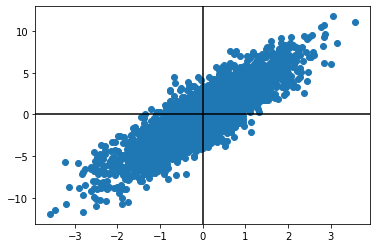

In [168]:
plt.axhline(color='black')
plt.axvline(color='black')
plt.scatter(x = data[:, 0], y = data[:, 1])
print(data.mean(axis=  0))

## Calculate the SVD:
$$
A * A^T = U \Sigma V^T V \Sigma^T U^T = U * \Sigma * \Sigma^T * U^T
$$
$$
A^T * A = V \Sigma^T U^T * U \Sigma V^T = V \Sigma^T * \Sigma * V^T
$$

Thus: Eigenvalues of $A^T * A$ are $\sigma^2$, the eigen vectors are the columns of V.

Eigenvalues of $A * A^T$ are also $\sigma^2$, the eigenvectors are the columns of U

In [169]:
# Calculate the SVD
u, sigma, v = np.linalg.svd(data, full_matrices=False)
print(u.shape)
#sigma = np.diag(sigma)
print(sigma.shape)
print(v.shape)
#u, sigma, v

(3000, 2)
(2,)
(2, 2)


# Principal components

In [170]:
# Each column of V is an eigenvector  of A.T @ A
print("Eigen values, " ,sigma ** 2)
print("Eigen vectors (rows)", v.T)

Eigen values,  [37657.77938135   685.25404395]
Eigen vectors (rows) [[ 0.24673517  0.96908295]
 [ 0.96908295 -0.24673517]]


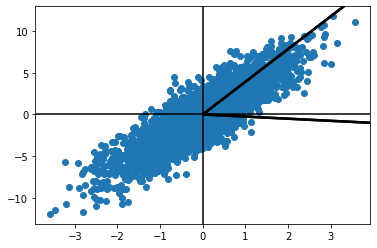

In [171]:
plt.axhline(color='black')
plt.axvline(color='black')
plt.scatter(x = data[:, 0], y = data[:, 1])
for a in v.T:
    plt.quiver([0,0], [0,0], a[0], a[1],angles='xy',scale=1)

In [172]:
def scatter_with_axes(data):
    plt.axhline(color='black')
    plt.axvline(color='black')
    plt.scatter(x = data[:, 0], y = data[:, 1])

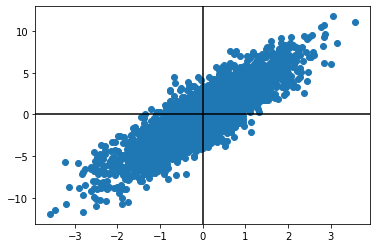

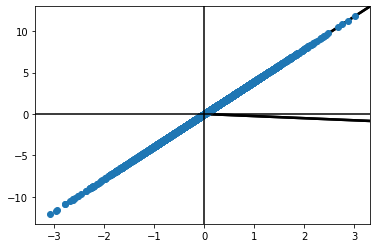

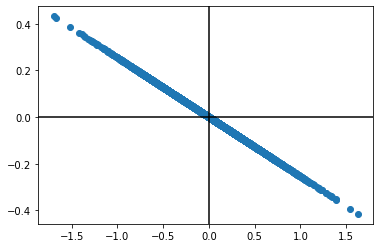

In [173]:
# sub is a vector
def project(x,sub):
    tmp = sub.reshape((-1))
    return (x @ sub / tmp.dot(tmp)) * tmp
    

k = 1
u = v[:, 0:1]
u2 = v[:, 1:2]

x = project(data, u)
x1 = project(data, u2)

scatter_with_axes(data)


plt.figure()
for a in v.T:
    plt.quiver([0,0], [0,0], a[0], a[1],angles='xy',scale=1)
scatter_with_axes(x)

plt.figure()
scatter_with_axes(x1)


In [174]:
u = v.T

In [175]:
v

array([[ 0.24673517,  0.96908295],
       [ 0.96908295, -0.24673517]])

In [176]:
M = 3000
data.shape

(3000, 2)

In [177]:
u.T.shape

(2, 2)

In [178]:
data @ u.T 

array([[ 0.90247285,  0.66383146],
       [-0.99326788,  0.38267422],
       [ 1.76298229,  0.11920671],
       ...,
       [-3.84978404,  0.31612508],
       [ 3.62771267, -0.15647632],
       [-1.33357677, -0.37252686]])

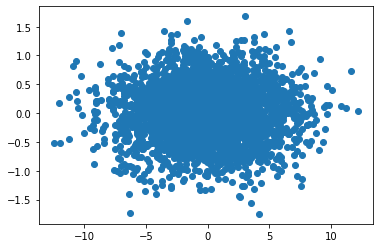

In [179]:
## New coordinate
new = data @ u.T
plt.scatter(x=new[:, 0], y=new[:, 1])

#for a in v.T:
#    plt.quiver([0,0], [0,0], a[0], a[1],angles='xy')

In [180]:
# Pick k: (k = 1)

tu = u[:1]
new = data @ tu.T


Threshold > 0.9 or 0.95

In [181]:
sigma, v.T

(array([194.05612431,  26.17735747]),
 array([[ 0.24673517,  0.96908295],
        [ 0.96908295, -0.24673517]]))

In [182]:
threshold = 0.9 * np.sum(sigma)
threshold

198.21013359722826

# Test: Eigenface

In [183]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [184]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)


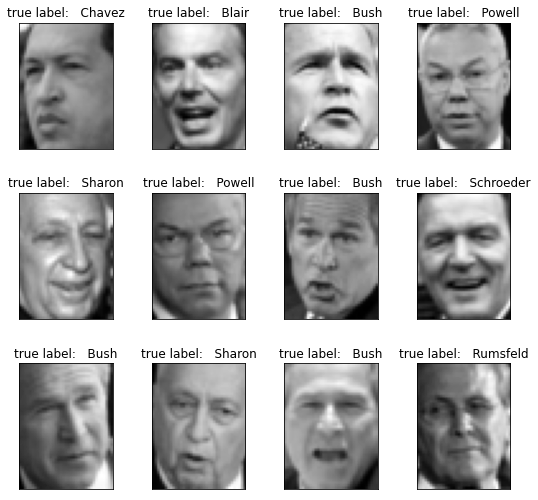

In [296]:

# credits: geeksforgeeks

def plot_gallery(images, titles, h, w, n_row = 3, n_col = 4):
    plt.figure(figsize =(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom = 0, left =.01, right =.99, top =.90, hspace =.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap = plt.cm.gray)
        if titles is not None:
            plt.title(titles[i], size = 12)
        plt.xticks(())
        plt.yticks(())
 
# Generate true labels above the images
def true_title(Y, target_names, i):
    true_name = target_names[Y[i]].rsplit(' ', 1)[-1]
    return 'true label:   % s' % (true_name)
 
true_titles = [true_title(y, target_names, i)
                     for i in range(y.shape[0])]
plot_gallery(X, true_titles, h, w)

In [186]:
n_samples, h, w = lfw_people.images.shape
print(n_samples, h, w)
X = lfw_people.data
n_features = X.shape[1]

y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

1288 50 37
Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


In [236]:
# some values from X
phi = X.T - X.T.mean(axis = 1).reshape((-1, 1))
phi.shape

(1850, 1288)

In [237]:
# Calculate the SVD of X
u, sigma, v = np.linalg.svd(phi, full_matrices=False)
print(u.shape)
#sigma = np.diag(sigma)
print(sigma.shape)
print(v.shape)
u, sigma, v


(1850, 1288)
(1288,)
(1288, 1288)


(array([[ 6.8169511e-03, -2.1665320e-02,  2.1656349e-02, ...,
          6.7253523e-03,  1.1852276e-02,  5.0013824e-03],
        [ 7.3635750e-03, -2.0481559e-02,  1.9303266e-02, ...,
          3.5296705e-02, -3.3431649e-02, -6.4187073e-03],
        [ 8.5502546e-03, -2.2290386e-02,  1.7782830e-02, ...,
         -2.4714157e-06,  2.6025709e-02,  5.6752877e-04],
        ...,
        [ 1.4045089e-02,  4.2917851e-02,  5.0177518e-02, ...,
          8.2509872e-03,  5.1629520e-04, -8.7939007e-03],
        [ 1.1956012e-02,  4.1260533e-02,  4.4041324e-02, ...,
          5.4515894e-03,  9.8984763e-03,  1.0386859e-02],
        [ 9.6407775e-03,  3.9629739e-02,  3.9368227e-02, ...,
          8.0596628e-03, -9.1940193e-03,  7.5981673e-04]], dtype=float32),
 array([2.5059695e+04, 2.2415258e+04, 1.5569257e+04, ..., 1.6471495e+01,
        1.5910949e+01, 5.9959561e-02], dtype=float32),
 array([[-0.00368809, -0.02578255,  0.01948529, ..., -0.04876293,
          0.04927448, -0.01525737],
        [-0.00416702

Get the eigenvectors of $A * A^T$

In [290]:
eigenval, eigenvec = np.linalg.eig(phi @ phi.T)

In [281]:
eigenvec.shape, eigenval

((1850, 1850),
 array([ 6.2798835e+08,  5.0244378e+08,  2.4240176e+08, ...,
        -4.3822846e-01,  3.8661766e-01, -1.1104057e-01], dtype=float32))

In [288]:
idx = np.argsort(eigenval)


In [291]:
sorted_eigenval = eigenval[idx]
sorted_eigenvec = eigenvec[idx]
sorted_eigenval, sorted_eigenvec

(array([ 6.2798835e+08,  5.0244378e+08,  2.4240176e+08, ...,
        -4.3822846e-01,  3.8661766e-01, -1.1104057e-01], dtype=float32),
 array([[ 6.8169511e-03,  2.1665320e-02,  2.1656349e-02, ...,
         -2.7253504e-05,  8.9881913e-04,  4.2504125e-04],
        [ 7.3635746e-03,  2.0481559e-02,  1.9303266e-02, ...,
          1.1779542e-02,  9.8409632e-04, -2.8043933e-02],
        [ 8.5502546e-03,  2.2290386e-02,  1.7782830e-02, ...,
          1.6957723e-02,  2.2519525e-02,  2.3036160e-02],
        ...,
        [ 1.4045089e-02, -4.2917851e-02,  5.0177518e-02, ...,
         -9.3660196e-03,  4.0605473e-03,  1.8643159e-02],
        [ 1.1956012e-02, -4.1260533e-02,  4.4041324e-02, ...,
         -7.1872096e-04, -3.5251556e-03, -1.4820829e-02],
        [ 9.6407775e-03, -3.9629739e-02,  3.9368227e-02, ...,
         -3.0926862e-03,  4.7351248e-03,  1.1555956e-02]], dtype=float32))

In [292]:
k = 150
# M = 1288
trimmed_eigenval = sorted_eigenval[:k]
trimmed_eigenvec = sorted_eigenvec[:,:k]
trimmed_eigenval.shape, trimmed_eigenvec.shape

((150,), (1850, 150))

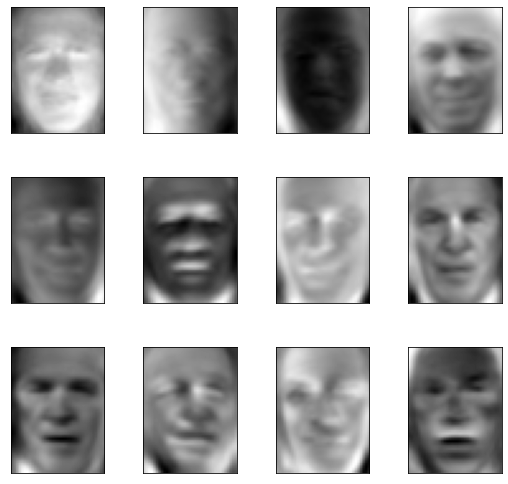

In [298]:
plot_gallery(trimmed_eigenvec.T, None, h, w)


In [299]:
pca = PCA(n_components = n_components, svd_solver ='randomized',
          whiten = True).fit(X)
eigenfaces = pca.components_.reshape((n_components, h, w))
X_pca = pca.transform(X)

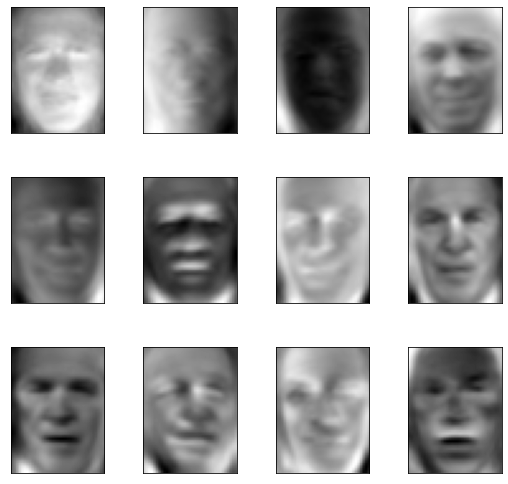

In [300]:
plot_gallery(trimmed_eigenvec.T, None, h, w)